Before plotting simulation errors, log files from real piepline and simulator should be put in corresponding directories with correct names. See README.md.

Figures are generated and saved in `figures` directory.

In [1]:
import evaluate
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Defining functions to plot simulation errors

In [2]:
# Function to plot a groupd bar chart
def grouped_bar_chart(ax, labels, xlabel, ylabel, *argv):
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars
    bars = len(argv)

    for i in range(len(argv)):
        arg = argv[i]
        ax.bar(x + (2 * i + 1 - bars) * width / 2, arg[1], width, label=arg[0], color=arg[2])

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(bottom=0, top=700)

In [3]:
# Function to show simulation errors in a grouped bar chart
def plot_task_error(ax, size):
    labels = ["read_1", "write_1", "read_2", "write_2", "read_3", "write_3"]

    # atop_file =     "log/cluster/100gb/atop_mem.log"
    real_time_log = "real/%dgb/timestamps.csv" % size
    sim_py_log = "pysim/%dgb_sim_time.csv" % size
    simgrid_org_log = "wrench/original/%dgb_sim_time.csv" % size
    simgrid_ext_log = "wrench/pagecache/%dgb_sim_time.csv" % size

    py_error = [item * 100 for item in evaluate.task_time_error(real_time_log, sim_py_log)]
    simgrid_org_error = [item * 100 for item in evaluate.task_time_error(real_time_log, simgrid_org_log)]
    simgrid_ext_error = [item * 100 for item in evaluate.task_time_error(real_time_log, simgrid_ext_log)]

    grouped_bar_chart(ax, labels, "", "error (%)",
                      ("Python simulator", py_error, "tab:pink"), ("Original WRENCH", simgrid_org_error, 'tab:orange'),
                      ("WRENCH simulator with page cache", simgrid_ext_error, 'tab:cyan'))
    ax.set_title("%d GB" % size)

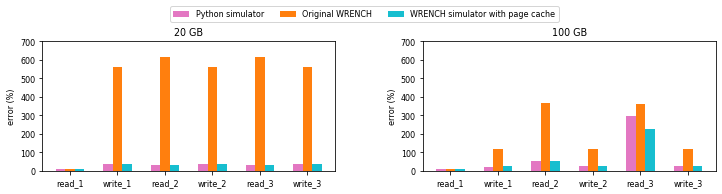

In [4]:
plt.rcParams.update({'font.size': 8})
fig, (ax1, ax2) = plt.subplots(figsize=(11, 3), ncols=2, nrows=1)
plot_task_error(ax1, 20)
plot_task_error(ax2, 100)

lgd = plt.legend(loc='upper center', bbox_to_anchor=(-0.2, 1.3), ncol=3)

plt.savefig("figures/single_errors.svg", format="svg", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig("figures/single_errors.pdf", format="pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.7, wspace=0.3)
plt.show()